In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.ensemble import RandomForestClassifier

### 1.Load Dataset.

In [4]:
file_list = glob("./data/bike/*")
file_list

['./data/bike\\sampleSubmission.csv',
 './data/bike\\test.csv',
 './data/bike\\train.csv']

In [6]:
train = pd.read_csv(file_list[2], parse_dates=["datetime"])
train.shape

(10886, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
test = pd.read_csv(file_list[1], parse_dates=["datetime"])
test.shape

(6493, 9)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [37]:
display(test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


### 2.Feature Engineering

In [14]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [36]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
display(test.shape)

(6493, 16)

In [35]:
print(f"train windspeed column :\n{train['windspeed'].value_counts().head()}", 
      f"test windspeed column :\n{test['windspeed'].value_counts().head()}",
      sep="\n\n")

train windspeed column :
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64

test windspeed column :
0.0000     867
11.0014    638
8.9981     618
12.9980    615
7.0015     583
Name: windspeed, dtype: int64


<Axes: title={'center': "Test's Windspeed"}, xlabel='windspeed', ylabel='count'>

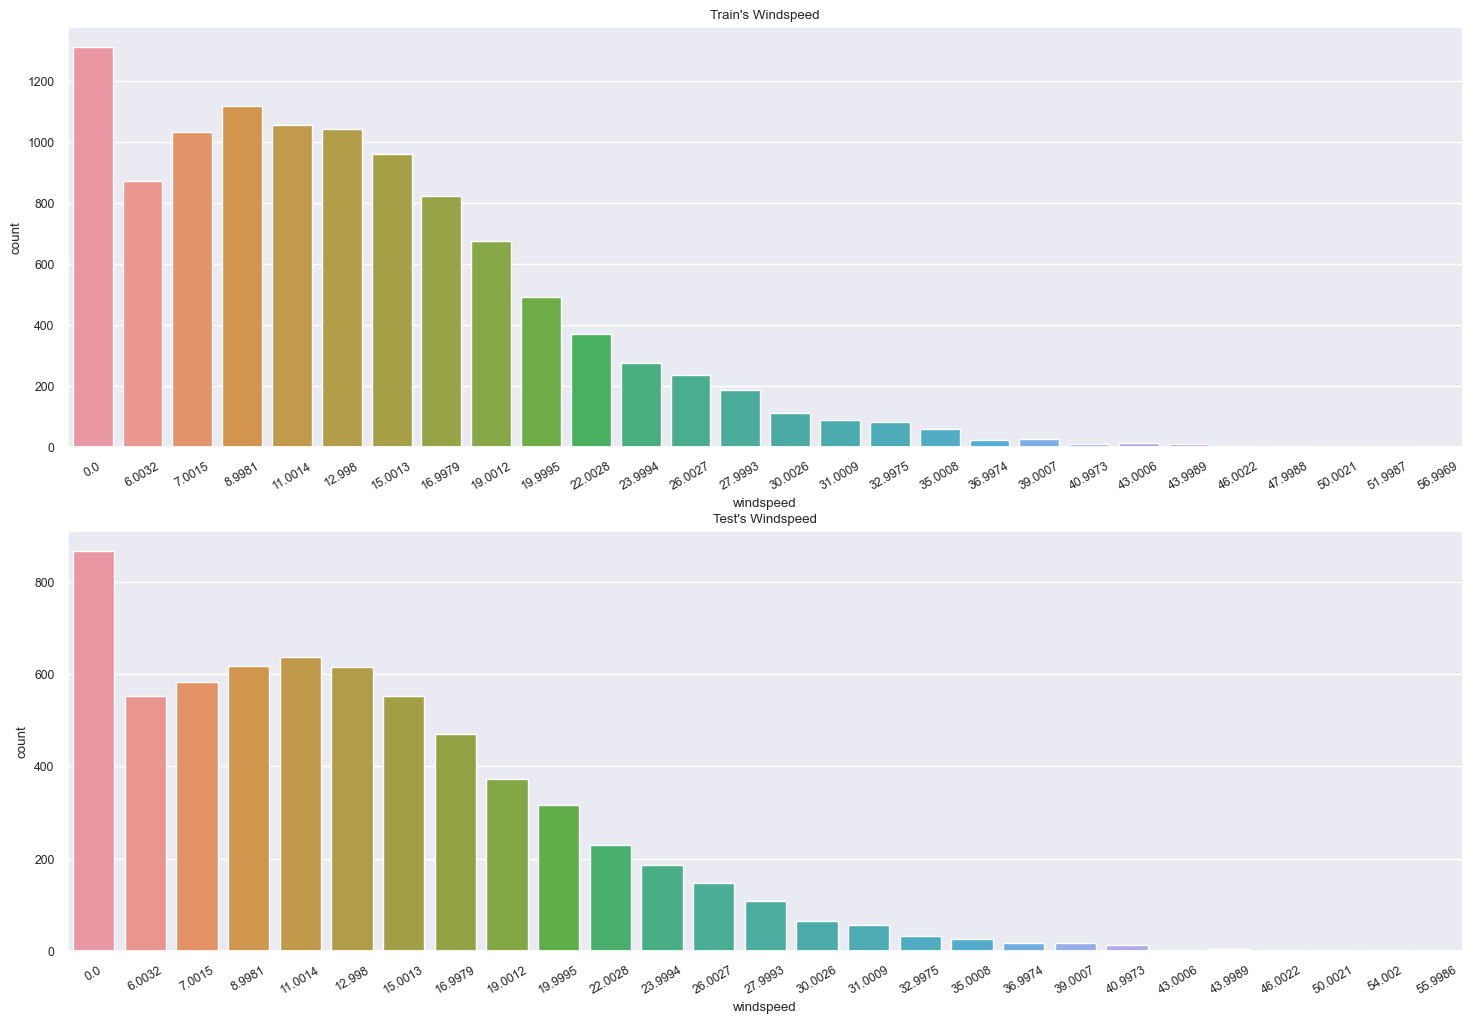

In [34]:
fig, axes = plt.subplots(2)
fig.set_size_inches(18, 12)

plt.sca(axes[0])
plt.xticks(rotation=30)
axes[0].set(title="Train's Windspeed")
sns.countplot(train,
              x="windspeed",
              ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30)
axes[1].set(title="Test's Windspeed")
sns.countplot(test,
              x="windspeed",
              ax=axes[1])

In [43]:
train_windspeed_zero = train[train["windspeed"] == 0]
train_windspeed_non_zero = train[train["windspeed"] != 0]
print(f"train\nwindspeed = 0: {train_windspeed_zero.shape[0]}",
      f"windspeed > 0: {train_windspeed_non_zero.shape[0]}"
      ,sep="\n")

train
windspeed = 0: 1313
windspeed > 0: 9573


In [63]:
data_windspeed_zero = train[train["windspeed"] == 0].copy()
data_windspeed_non_zero = train[train["windspeed"] != 0].copy()

In [64]:
data_windspeed_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [65]:
data_windspeed_non_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [66]:
feature_column_list = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
feature_column_list

['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

In [67]:
data_windspeed_non_zero["windspeed"] = data_windspeed_non_zero["windspeed"].astype("str")

In [68]:
data_windspeed_non_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9573 entries, 5 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    9573 non-null   datetime64[ns]
 1   season      9573 non-null   int64         
 2   holiday     9573 non-null   int64         
 3   workingday  9573 non-null   int64         
 4   weather     9573 non-null   int64         
 5   temp        9573 non-null   float64       
 6   atemp       9573 non-null   float64       
 7   humidity    9573 non-null   int64         
 8   windspeed   9573 non-null   object        
 9   casual      9573 non-null   int64         
 10  registered  9573 non-null   int64         
 11  count       9573 non-null   int64         
 12  year        9573 non-null   int64         
 13  month       9573 non-null   int64         
 14  day         9573 non-null   int64         
 15  hour        9573 non-null   int64         
 16  minute      9573 non-nu

In [70]:
rf_model_windspeed = RandomForestClassifier()

rf_model_windspeed.fit(data_windspeed_non_zero[feature_column_list], data_windspeed_non_zero["windspeed"])

windspeed_predict = rf_model_windspeed.predict(data_windspeed_zero[feature_column_list])

In [72]:
len(windspeed_predict)

1313

In [73]:
predict_windspeed_zero = data_windspeed_zero.copy()
predict_windspeed_non_zero = data_windspeed_non_zero.copy()

In [74]:
predict_windspeed_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [75]:
predict_windspeed_non_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [79]:
predict_windspeed_zero["windspeed"] = windspeed_predict
predict_windspeed_zero.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,1,2011,1,1,4,0,0,5


In [84]:
predict_windspeed_zero["windspeed"] = predict_windspeed_zero["windspeed"].astype("float")

In [85]:
predict_windspeed_zero["windspeed"].describe()

count    1313.000000
mean        9.999599
std         5.334493
min         6.003200
25%         6.003200
50%         7.001500
75%        12.998000
max        40.997300
Name: windspeed, dtype: float64

<Axes: xlabel='windspeed', ylabel='count'>

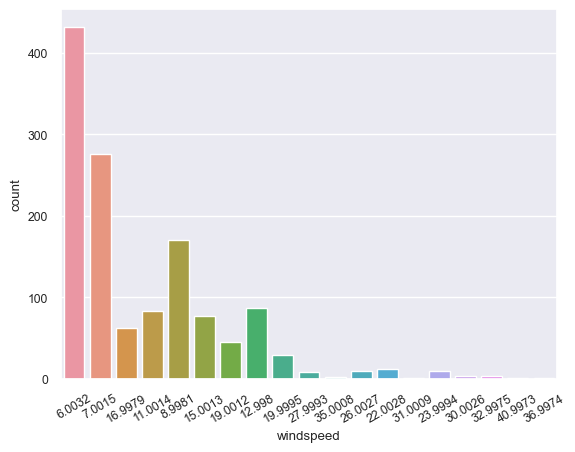

In [81]:
plt.xticks(rotation=30)
sns.countplot(predict_windspeed_zero,
              x="windspeed")

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def predict_windspeed(data:pd.DataFrame) -> pd.DataFrame:
    # "windspeed" 컬럼값에 따라 dataframe 분리
    # - windspeed의 값이 0이 아닌 데이터셋을 이용하여 train
    # - windspeed의 값이 0인 데이터셋으로 test(predict)
    data_windspeed_zero = data[data["windspeed"] == 0]
    data_windspeed_non_zero = data[data["windspeed"] != 0]
    
    # feature로 사용할 컬럼 정의
    feature_column_list = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # train 대상 데이터셋의 labeled column(예측하려는 값)의 data type 변경
    data_windspeed_non_zero["windspeed"] = data_windspeed_non_zero["windspeed"].astype("str")

    # 모델 인스턴스 생성(랜덤포레스트)
    rf_model_windspeed = RandomForestClassifier()

    # 랜덤포레스트 알고리즘을 이용하여 데이터 학습
    rf_model_windspeed.fit(data_windspeed_non_zero[feature_column_list], data_windspeed_non_zero["windspeed"])

    # 학습된 모델을 이용하여 windspeed의 값이 0인 데이터셋의 windspeed 값을 예측
    windspeed_predict = rf_model_windspeed.predict(data_windspeed_zero[feature_column_list])

    # 
    predict_windspeed_zero = data_windspeed_zero.copy()
    predict_windspeed_non_zero = data_windspeed_non_zero.copy()

    predict_windspeed_zero["windspeed"] = windspeed_predict

    predict_windspeed_non_zero.append()